In [456]:
import pandas as pd
import numpy as np


from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from statistics import mean
import random

from scipy import stats
from scipy.stats import mode, norm, skew
from math import sqrt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import cross_val_score

from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor 
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV


from sklearn import metrics

from sklearn import preprocessing

from sklearn.utils import resample

from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


In [457]:
#To begin I am opening and reading the CSV file 

d = pd.read_csv('./dataset.csv')
d

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [458]:
#I am working with a large data set so I want to see all the columns available 
d.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [459]:
#With this code I am dscribing the target value statistics 
# of the SalePrice column as this is the main focus of this assignment

d['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [460]:
#Now I will check the skewness and kurtosis of the Sale Price. 
#This is needed to check the lack of simitry in respect to normal data distribution

print("Skewness: %f" % d['SalePrice'].skew())
print("Kurtosis: %f" % d['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


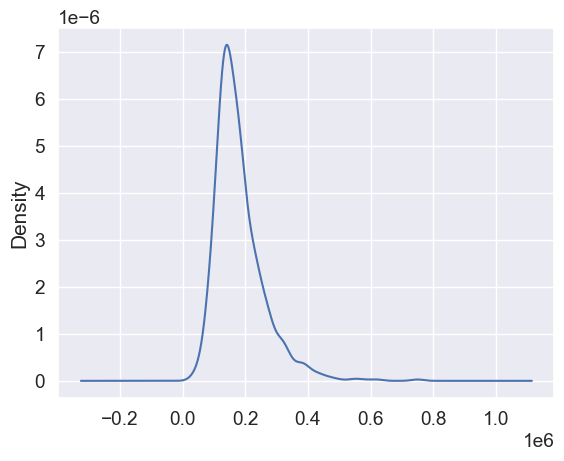

In [461]:
#The results above can be ploted on the grapth to see how skewed the SalePrice is

d['SalePrice'].plot(kind='density')
plt.show()

In [462]:
#Now we can fix the skewness 

d["SalePrice"] = np.log1p(d["SalePrice"])

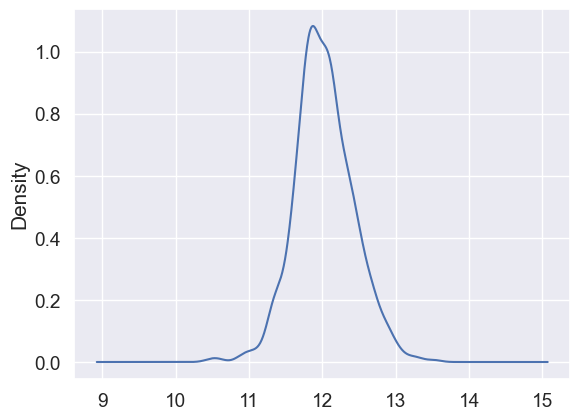

In [463]:
#Ploting the graph again to see how the fix affected it 
#The graph has shifted to the middle meaning that the Sale Price destribution is equal now

d['SalePrice'].plot(kind='density')
plt.show()

In [464]:
# In this notebook I care about using the most correlated values to the SalePrice,
# This code will show us the percentage correlation to the target variable

print("Find most important features relative to target")
corr = d.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Find most important features relative to target
SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    

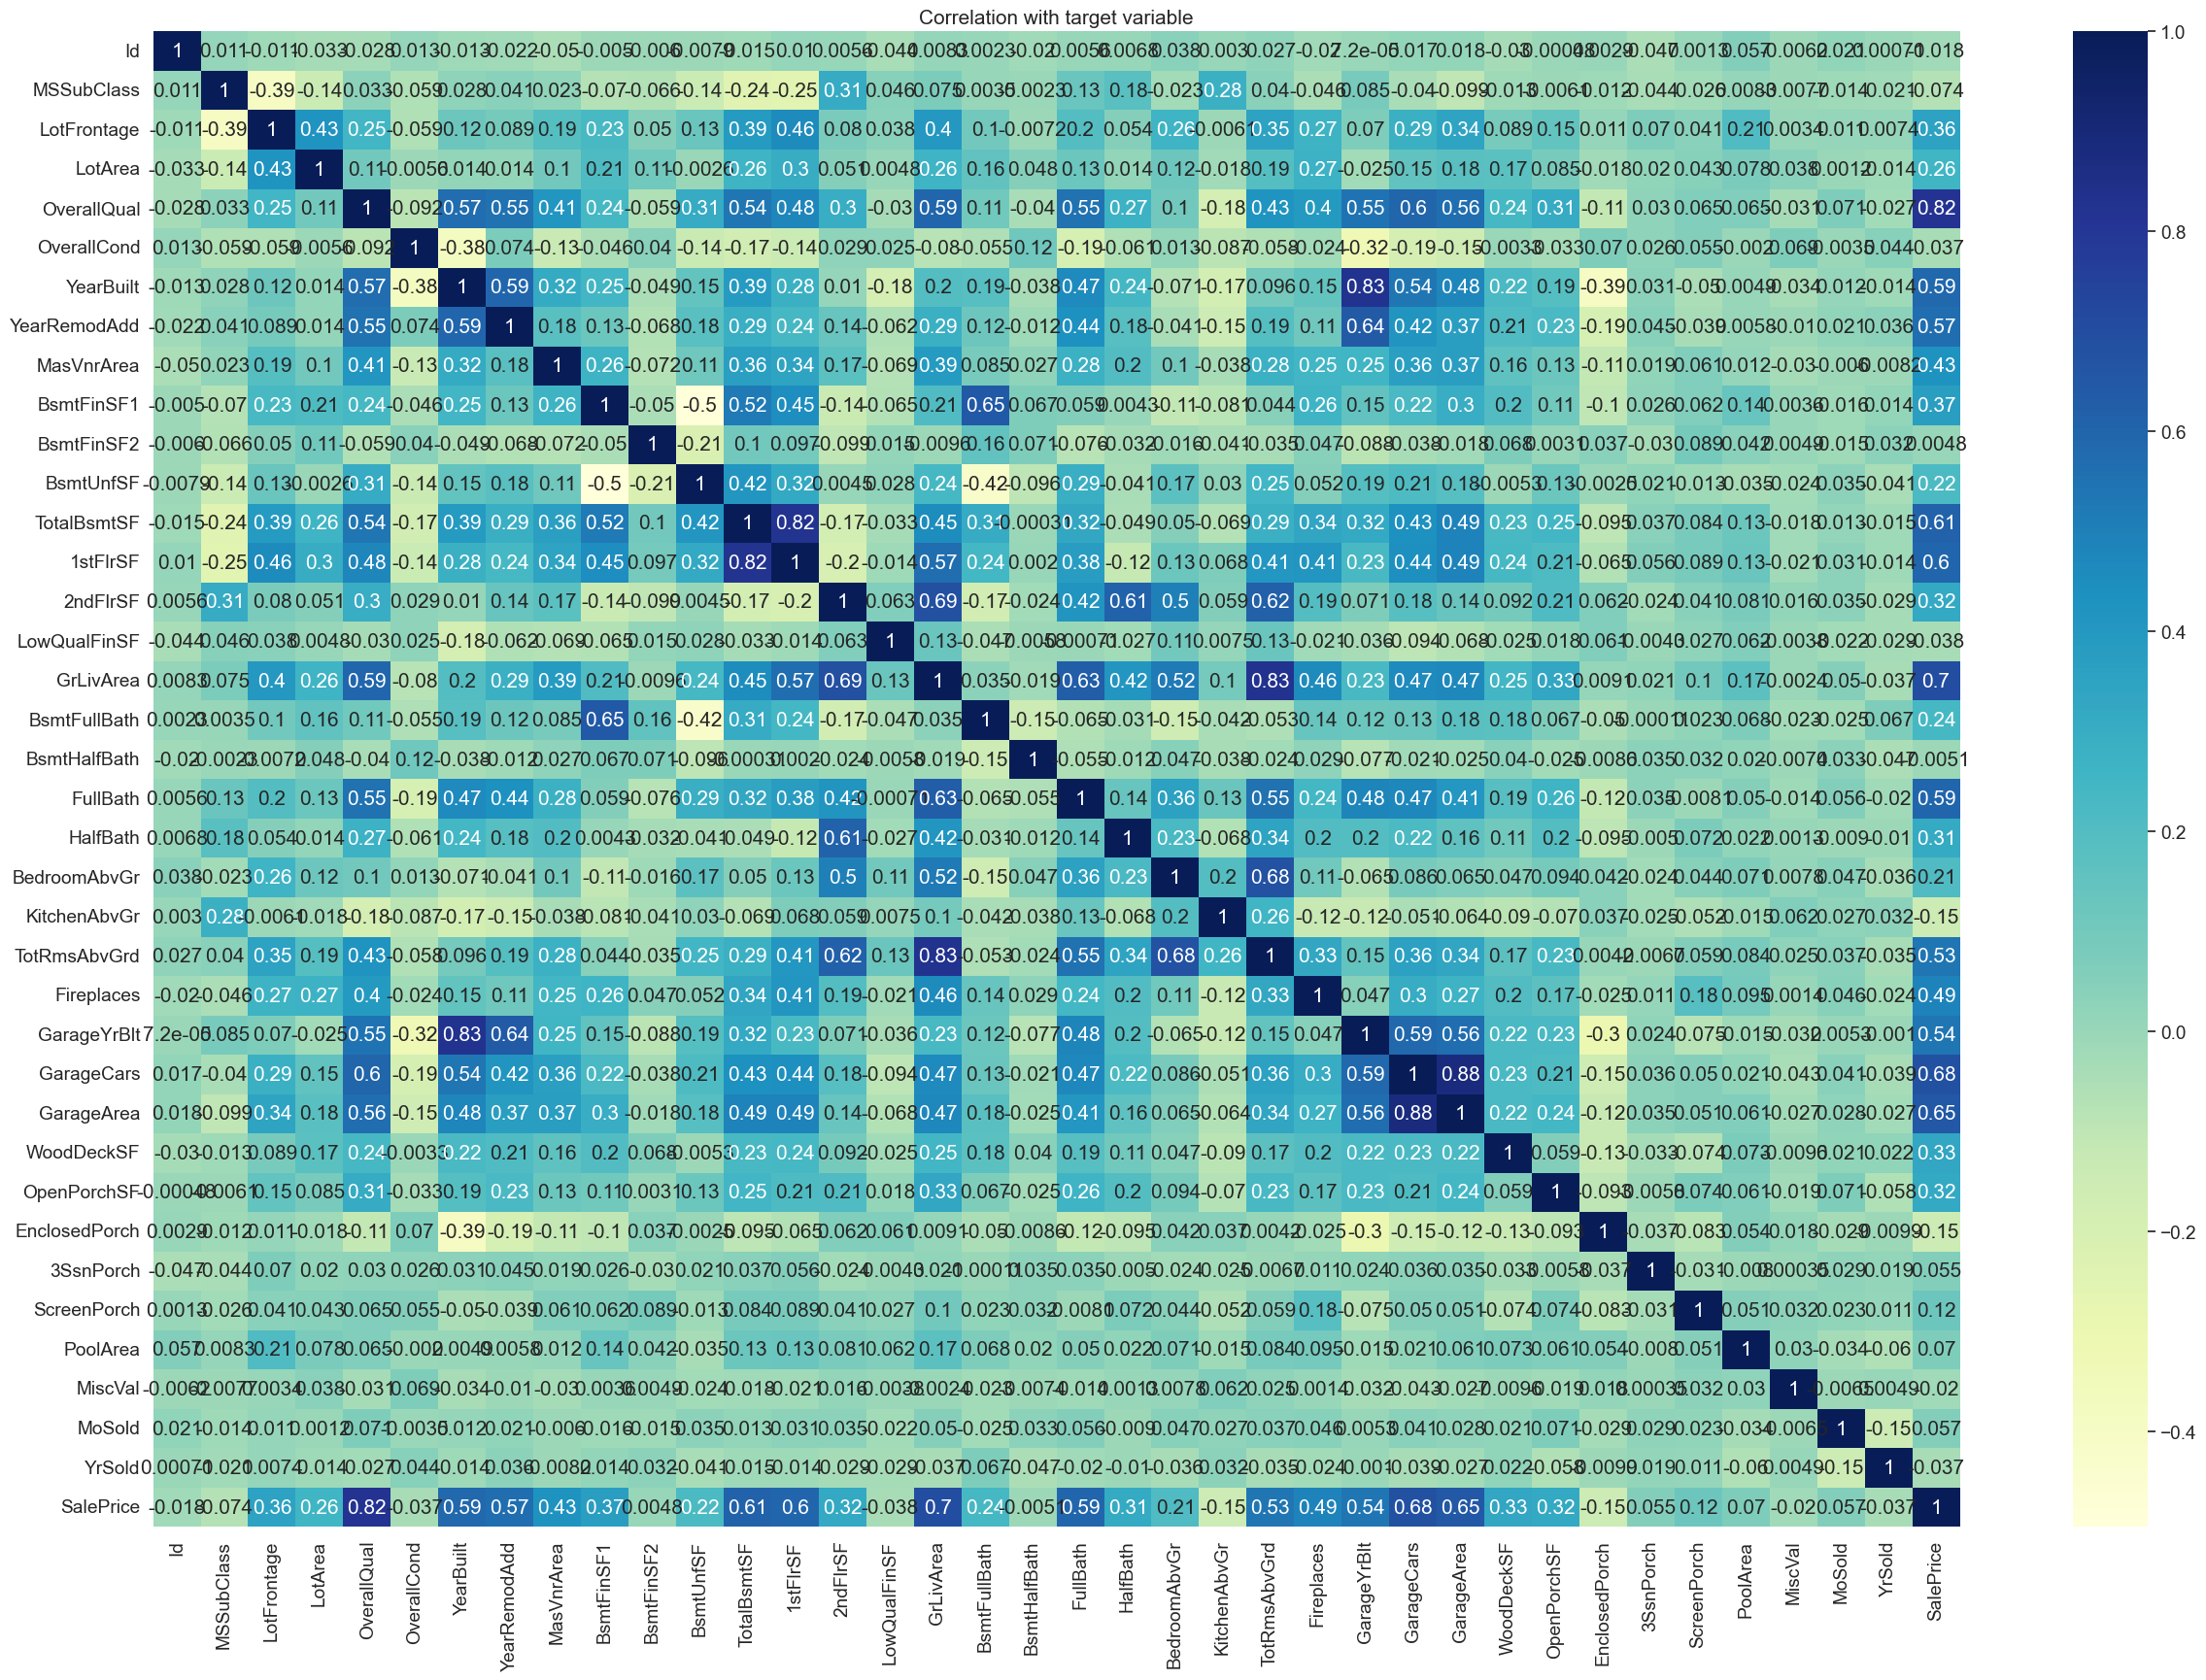

In [465]:
#Since the above can be hard to read, this can also be interpreted as a graph 
#This graph is used to visualise the most correlated values OVERALL.


correlation_matrix = d.corr()

plt.figure(figsize = (30, 20))
sns.heatmap(correlation_matrix, annot = True, cmap="YlGnBu")
plt.title("Correlation with target variable")
plt.show()

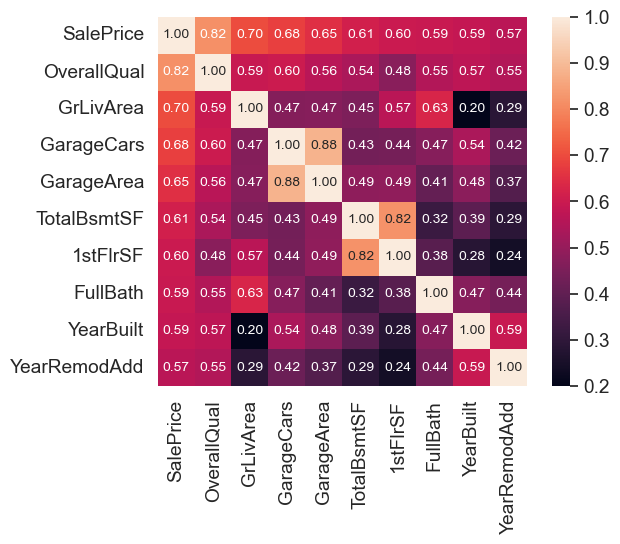

In [466]:
#For this assignment I am only interested in the Sales Price correlation 
# so I cancan use a heat map to better see tha correlations to this particular variable


k = 10 
#10 is a number of variables

cols = correlation_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(d[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

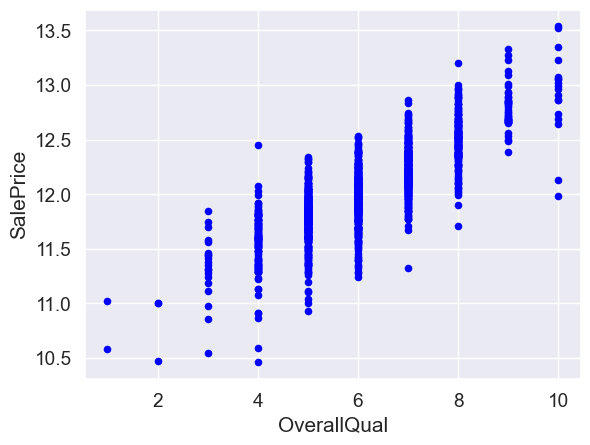

In [467]:
#Now that I have identified the most correlated values, I can use some of them individually 
#.. to see what effect they may have on the Sale Price.
# This graph shows the correlatinon between the quality of a house and its selling price. 

d.plot.scatter(x='OverallQual', y='SalePrice', c='Blue')
plt.show()

#The price is increasing as the quality icreases. These two are highly correlated.

<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>

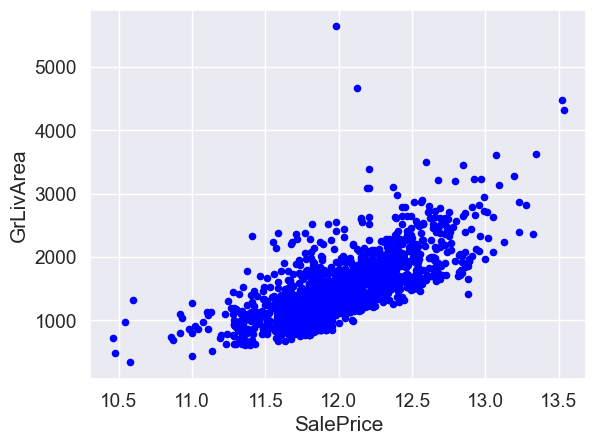

In [468]:
#Another highly correlated variable to SalePrice is GrLivArea,
# This graph shows the correlation of the two


d.plot.scatter(x='SalePrice', y='GrLivArea', c='Blue')

In [469]:
#Now we have to fix the dataset including all the null values 
#With this code I can see all the null value in the data set

d.head()
d.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [470]:
#The data above is too long to fit, so to see each null value seperately I am using the code below 
# It also gives me a percentage of each null value, so I can make further decisions
# on which columns can be dropped and which may need improvement.

for column in d.columns:
    if d[column].isnull().sum() > 0:
        print(column, ': {:.2%}'.format(d[column].isnull().sum() /
                                               d[column].shape[0]))

LotFrontage : 17.74%
Alley : 93.77%
MasVnrType : 0.55%
MasVnrArea : 0.55%
BsmtQual : 2.53%
BsmtCond : 2.53%
BsmtExposure : 2.60%
BsmtFinType1 : 2.53%
BsmtFinType2 : 2.60%
Electrical : 0.07%
FireplaceQu : 47.26%
GarageType : 5.55%
GarageYrBlt : 5.55%
GarageFinish : 5.55%
GarageQual : 5.55%
GarageCond : 5.55%
PoolQC : 99.52%
Fence : 80.75%
MiscFeature : 96.30%


In [471]:
#These columns have too high of a null value (over 80%) so I will drop them

d = d.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'],axis=1)
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [472]:
# These columns have no correlation with Sale price (target value) and therefore are not useful for me.

d.drop(['BsmtUnfSF', 'BsmtFinSF1', 'BsmtFinSF2', 'YearBuilt', 'YearRemodAdd',
        'OverallQual', 'OverallCond', 'LotArea', 'MSSubClass'],axis=1, inplace=True)
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  RoofStyle      1460 non-null   object 
 15  RoofMatl       1460 non-null   object 
 16  Exterior1st    1460 non-null   object 
 17  Exterior2nd    1460 non-null   object 
 18  MasVnrTy

In [473]:
#Columns below have less null values
# so I am filling up this column with a mean value in column for all missing fields

d['LotFrontage'].fillna((d['LotFrontage'].mean()), inplace=True)
d['MasVnrArea'].fillna((d['MasVnrArea'].mean()), inplace=True )
d['GarageYrBlt'].fillna((d['GarageYrBlt'].mean()), inplace=True )
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  RoofStyle      1460 non-null   object 
 15  RoofMatl       1460 non-null   object 
 16  Exterior1st    1460 non-null   object 
 17  Exterior2nd    1460 non-null   object 
 18  MasVnrTy

In [474]:
#Becasue the data set connsists of numerical and categorical features I want to split those,
#I can not fix the object features the same way I fixed numerical ones

d_cut = d.select_dtypes(include=['object'])
d_num =d.select_dtypes(exclude=['object'])

#With this code we can see all object columns
d_cut.dtypes

#With this code we can see all numerical columns (can't run simultaniously)
#d_num.dtypes

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [475]:
#Now I want to fix the other null value columns, but they are objects, 
#so first we will check how many object columns have null values

null_counts = d_cut.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
MSZoning           0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        0
Functional         0
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PavedDrive         0
SaleType           0
SaleCondition      0
dtype: int64


In [476]:
# I will fill the NsmtQual, BsmtCond, BsmExposire, BsmtFinType1, BsmtFinType3, GarageType, 
# GarageFinish, GarageQual, FireplaceQu and GarageCond with null values. 
#The rest of the columns will be filles with th most frequent value.

columns_with_lowNA = ['MSZoning','Utilities','Exterior1st','Exterior2nd','MasVnrType','Electrical','KitchenQual','Functional','SaleType']


d_cut[columns_with_lowNA] = d_cut[columns_with_lowNA].fillna(d_cut.mode().iloc[0])

columns_None = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','FireplaceQu','GarageCond']
d_cut[columns_None]= d_cut[columns_None].fillna('None')


d_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1460 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

In [477]:
#Standard encoding for categorical features

bin_map  = {'TA':2,'Gd':3, 'Fa':1,'Ex':4,'Po':1,'None':0,'Y':1,'N':0,'Reg':3,'IR1':2,'IR2':1,'IR3':0,"None" : 0,
            "No" : 2, "Mn" : 2, "Av": 3,"Gd" : 4,"Unf" : 1, "LwQ": 2, "Rec" : 3,"BLQ" : 4, "ALQ" : 5, "GLQ" : 6
            }
d_cut['ExterQual'] = d_cut['ExterQual'].map(bin_map)
d_cut['ExterCond'] = d_cut['ExterCond'].map(bin_map)
d_cut['BsmtCond'] = d_cut['BsmtCond'].map(bin_map)
d_cut['BsmtQual'] = d_cut['BsmtQual'].map(bin_map)
d_cut['HeatingQC'] = d_cut['HeatingQC'].map(bin_map)
d_cut['KitchenQual'] = d_cut['KitchenQual'].map(bin_map)
d_cut['FireplaceQu'] = d_cut['FireplaceQu'].map(bin_map)
d_cut['GarageQual'] = d_cut['GarageQual'].map(bin_map)
d_cut['GarageCond'] = d_cut['GarageCond'].map(bin_map)
d_cut['CentralAir'] = d_cut['CentralAir'].map(bin_map)
d_cut['LotShape'] = d_cut['LotShape'].map(bin_map)
d_cut['BsmtExposure'] = d_cut['BsmtExposure'].map(bin_map)
d_cut['BsmtFinType1'] = d_cut['BsmtFinType1'].map(bin_map)
d_cut['BsmtFinType2'] = d_cut['BsmtFinType2'].map(bin_map)

PavedDrive =   {"N" : 0, "P" : 1, "Y" : 2}
d_cut['PavedDrive'] = d_cut['PavedDrive'].map(PavedDrive)

print(d_cut)

     MSZoning Street  LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave         3         Lvl    AllPub    Inside       Gtl   
1          RL   Pave         3         Lvl    AllPub       FR2       Gtl   
2          RL   Pave         2         Lvl    AllPub    Inside       Gtl   
3          RL   Pave         2         Lvl    AllPub    Corner       Gtl   
4          RL   Pave         2         Lvl    AllPub       FR2       Gtl   
...       ...    ...       ...         ...       ...       ...       ...   
1455       RL   Pave         3         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave         3         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave         3         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave         3         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave         3         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2  ... KitchenQual Functional  \
0         CollgC

In [478]:
#Using one hot encoding on categorical values

object_columns = d_cut.select_dtypes(include=['object'])

#One hot encoder
d_cut = pd.get_dummies(d_cut, columns=object_columns.columns) 

#printing the results as data
d_cut.head()


,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,3,4,2,4,2,2,6,1,4,1,...,0,0,0,1,0,0,0,0,1,0
1,3,2,2,4,2,4,5,1,4,1,...,0,0,0,1,0,0,0,0,1,0
2,2,4,2,4,2,2,6,1,4,1,...,0,0,0,1,0,0,0,0,1,0
3,2,2,2,2,4,2,5,1,4,1,...,0,0,0,1,1,0,0,0,0,0
4,2,4,2,4,2,3,6,1,4,1,...,0,0,0,1,0,0,0,0,1,0


In [479]:
#Now I want to combine the numerical and the categorical columns so 
#I don't have to keep refering to seperate data sets and can have them in one place

d_final = pd.concat([d_num, d_cut], axis = 1)
print("New number of features: " + str(d.shape[1]))

#To see the data table 

d_final.head()


New number of features: 68


,Id,LotFrontage,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,196.0,856,856,854,0,1710,1,0,...,0,0,0,1,0,0,0,0,1,0
1,2,80.0,0.0,1262,1262,0,0,1262,0,1,...,0,0,0,1,0,0,0,0,1,0
2,3,68.0,162.0,920,920,866,0,1786,1,0,...,0,0,0,1,0,0,0,0,1,0
3,4,60.0,0.0,756,961,756,0,1717,1,0,...,0,0,0,1,1,0,0,0,0,0
4,5,84.0,350.0,1145,1145,1053,0,2198,1,0,...,0,0,0,1,0,0,0,0,1,0


In [480]:
#To see again if we have any null values left we can use this code. 
#And it shows that I have successfully fixed all the null values

d_final.isnull().sum().sum()

0

In [485]:
#Now it is possible to see how the model performs and what would be the accuracy of the house price prediction

X = d_final.copy()
Y = d_final['SalePrice']
X = X.drop(['SalePrice'], axis=1)

#Training the model

trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2, random_state=42)

m = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
max_depth=4, max_features='sqrt',
min_samples_leaf=15, min_samples_split=10, 
loss='huber', random_state =5)

scores = cross_val_score(m, X, Y, scoring="neg_mean_squared_error", cv= 5)

mean_score = scores.mean()
std_score = scores.std()


m.fit(trainX, trainY)
predY = m.predict(testX)

#I am using the gradient boosting results to show the oveall score, mean score, best score and the standard deviation

print("Gradient Boosting Results:")

print("Scores: ",scores)
print("Mean score: ", mean_score)
print("Best score: ", scores.max())
print("Standard Deviation ", std_score)

#Now I want to know the accuracy of my model and the percentage at which it will predict the house price.

print("R2 score: ",r2_score(testY, predY))

#The accuracy score of the model (R2) is 89% 


Gradient Boosting Results:
Scores:  [-0.01559245 -0.02313839 -0.01764375 -0.01752805 -0.02123125]
Mean score:  -0.01902677799609868
Best score:  -0.015592450117047475
Standard Deviation  0.0027465838425595247
R2 score:  0.8910294372427943
